# Anomaly Detection - Isolation Forest

Before we jump into Python examples and implementation, let's look into how this algorithm works. 

Imagine you're in a forest, and you see a group of trees that are all similar in height, color, and type. But then, you notice one tree that's very different - it's much taller, has different leaves, and stands out from the rest. In the world of machine learning, this unique tree can be considered an "anomaly" - something that's different from the norm.

The Isolation Forest algorithm is like a game of "find the unique tree" in a forest. Here's how it works:

1. Split the Forest:
    - The algorithm randomly picks a feature like height, leaf color, or type of tree (oak, pine, etc). In a dataset, these features would be the different columns or attributes that describe each data point.
    - The algorithm then splits the forest into two parts based on that feature by randomly selecting a value within the range of that feature to split the data. *For example, if the chosen feature is "height," and the heights of the trees in the forest range from 3 feet to 30 meters, the algorithm might randomly pick a value like 15 meters.
    - The algorithm continues this process, randomly selecting features and split values, and dividing the groups further and further. Each split creates smaller and smaller subsets of the data.
2. Isolate the Tree: The unique tree (anomaly) will be different from the others, so it will be isolated in fewer splits compared to the normal trees. Think of it like playing a game of "20 Questions" - you'd guess the unique tree in fewer questions than a common tree.
3. Score the Trees: The algorithm gives each tree a score based on how quickly it was isolated. The quicker a tree is isolated, the higher its score, indicating it's more likely to be an anomaly.

The Isolation Forest algorithm is like playing a game in a forest to quickly find the unique, standout trees. It's a way to spot the unusual patterns or data points in a dataset, which can be really useful in many areas, like detecting fraud in financial transactions or identifying rare events in scientific research.

In [ ]:
#!pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Example: Synthetic Data

# Example: Stock market data from Yahoo Finance 
## Step 1: Install and Import Required Packages

In [ ]:
# already done above

## Step 2: Generate Synthetic Data

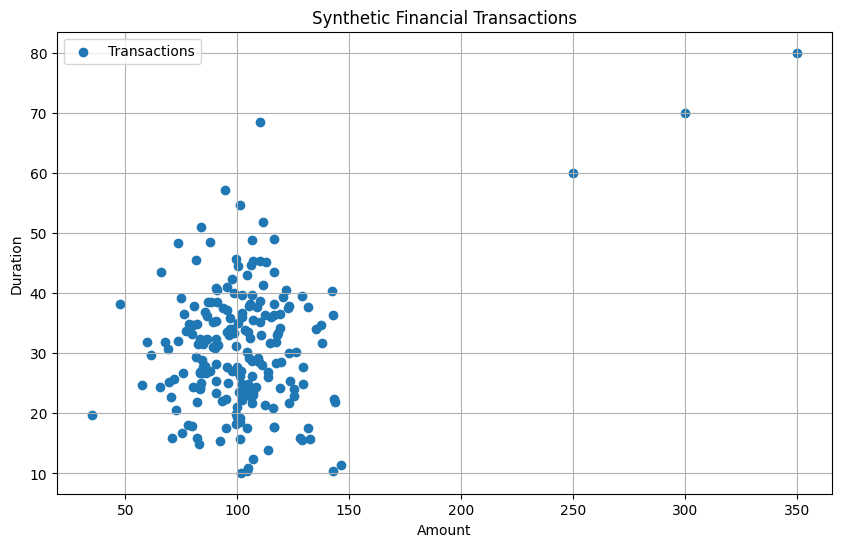

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for normal transactions
normal_transactions = np.random.normal(loc=[100, 30], scale=[20, 10], size=(200, 2))

# Generate synthetic data for anomalous transactions
anomalous_transactions = np.array([[250, 60], [300, 70], [350, 80]])

# Combine the data and create a DataFrame
data = np.vstack([normal_transactions, anomalous_transactions])
df = pd.DataFrame(data, columns=['Amount', 'Duration'])

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], label='Transactions')
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Synthetic Financial Transactions')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Apply Isolation Forest

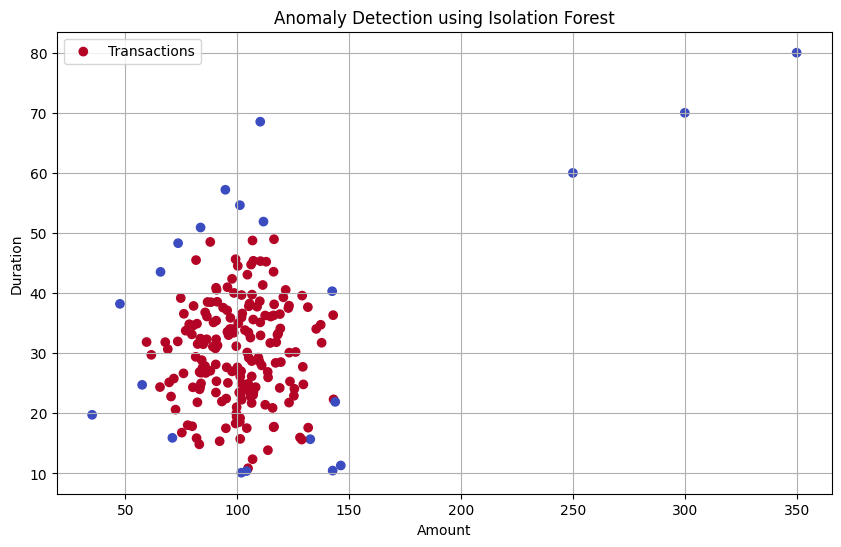

In [7]:
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df[['Amount', 'Duration']])

# Plot the transactions and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], c=df['Anomaly'], cmap='coolwarm', label='Transactions')
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()


In this plot, the points are colored based on whether they are considered normal (blue) or anomalous (red) by the Isolation Forest algorithm.

Tweak the `contamination` parameter to vary the severity with which algorithm determines anomalies.

### Visualizing the Concept

To visualize the concept of the Isolation Forest algorithm, we can create a series of plots showing how the data is split at each step. This requires a more involved implementation, so for simplicity, we'll demonstrate the concept with a few splits:

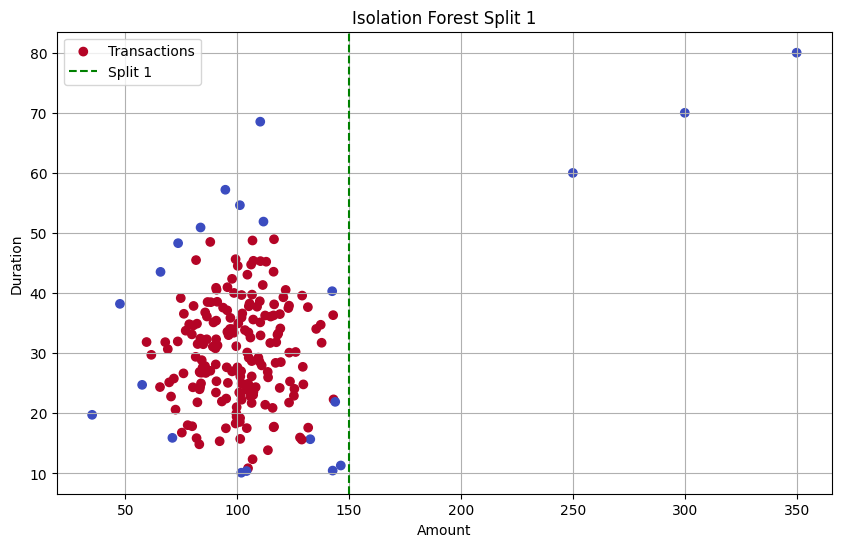

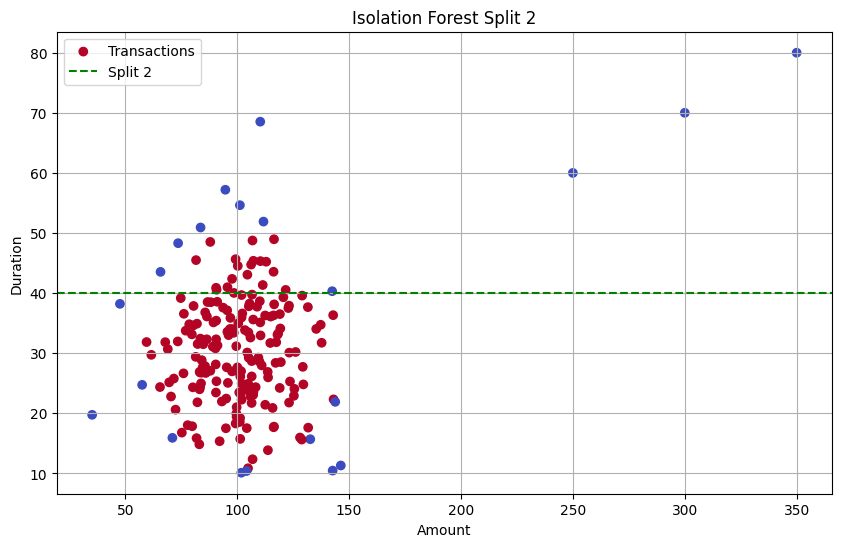

In [8]:
def plot_split(df, feature, threshold, step):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Amount'], df['Duration'], c=df['Anomaly'], cmap='coolwarm', label='Transactions')
    if feature == 'Amount':
        plt.axvline(x=threshold, linestyle='--', color='green', label=f'Split {step}')
    else:
        plt.axhline(y=threshold, linestyle='--', color='green', label=f'Split {step}')
    plt.xlabel('Amount')
    plt.ylabel('Duration')
    plt.title(f'Isolation Forest Split {step}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example splits (in practice, these would be determined by the Isolation Forest algorithm)
plot_split(df, 'Amount', 150, 1)
plot_split(df, 'Duration', 40, 2)

In these plots, the dashed green lines represent hypothetical splits made by the Isolation Forest algorithm. The first split is made on the `Amount` feature, and the second split is made on the `Duration` feature. Anomalies are typically isolated in fewer splits, as shown by the red points in the plots.

This visualization provides a simplified view of how the Isolation Forest algorithm works. In practice, the algorithm makes many such splits in a randomized manner, efficiently isolating anomalies in the data.

# Example: Stock market data from Yahoo Finance 
## Step 1: Install and Import Required Packages

In [3]:
# already done above

## Step 2: Download AAPL Stock Data

In [4]:
# Download historical data for AAPL
aapl_data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

# Use the closing prices
closing_prices = aapl_data['Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


## Step 3: Apply Isolation Forest

In [5]:
# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.02)  # Assuming 2% of data are outliers
anomaly_pred = iso_forest.fit_predict(closing_prices)

# Find data points predicted as anomalies
anomalies = closing_prices[anomaly_pred == -1]
anomaly_indices = np.where(anomaly_pred == -1)[0]

## Step 4: Visualization

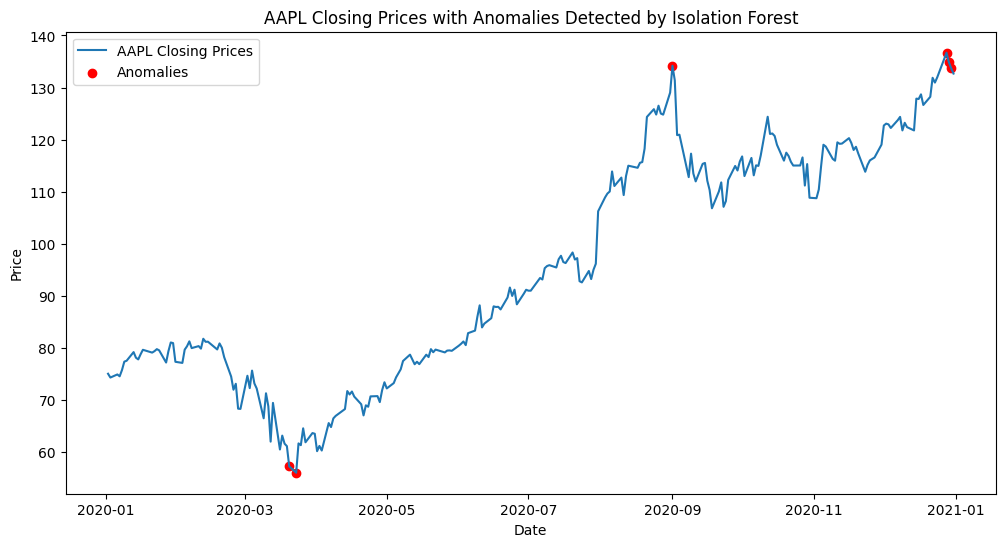

In [6]:
# Plot the closing prices and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(aapl_data.index, closing_prices, label='AAPL Closing Prices')
plt.scatter(aapl_data.index[anomaly_indices], anomalies, color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Closing Prices with Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()

## Discussion: Prices vs. Returns for Isolation Forest

Isolation Forest can work directly on closing prices, but using returns (percentage change in prices) can sometimes provide better insights, especially for financial time series data. Returns tend to have a more stationary distribution compared to raw prices, which can improve the performance of anomaly detection techniques. To use returns, you can modify the data preprocessing step as follows:

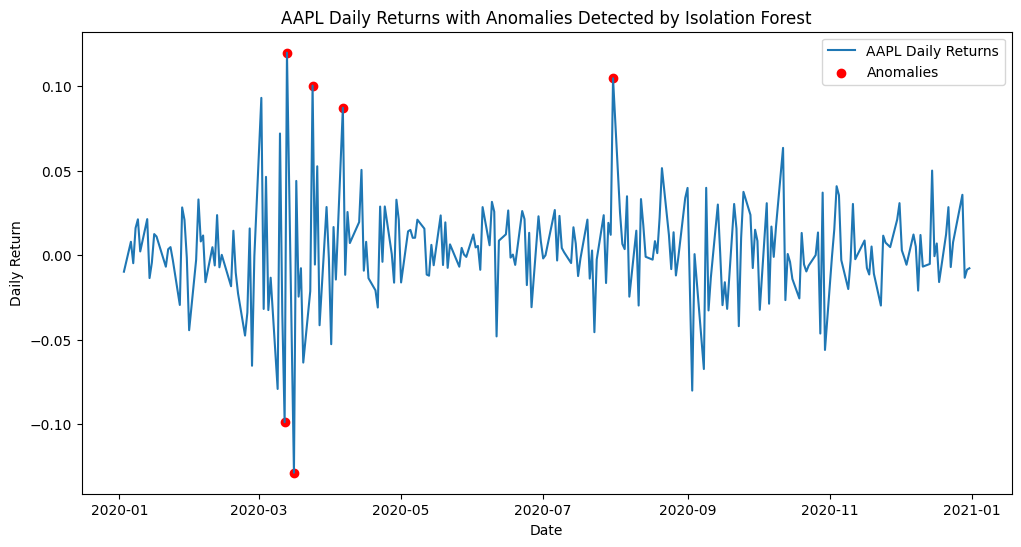

In [7]:
# Calculate daily returns
daily_returns = aapl_data['Close'].pct_change().dropna().values.reshape(-1, 1)

# Apply Isolation Forest on returns
iso_forest_returns = IsolationForest(contamination=0.02)
anomaly_pred_returns = iso_forest_returns.fit_predict(daily_returns)

# Find data points predicted as anomalies in returns
anomalies_returns = daily_returns[anomaly_pred_returns == -1]
anomaly_indices_returns = np.where(anomaly_pred_returns == -1)[0]

# Plot the daily returns and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(aapl_data.index[1:], daily_returns, label='AAPL Daily Returns')
plt.scatter(aapl_data.index[1:][anomaly_indices_returns], anomalies_returns, color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Returns with Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


In this example, the `contamination` parameter is set to 0.02, indicating that we expect approximately 2% of the data points to be outliers. You can adjust this parameter based on your understanding of the dataset. The choice between using prices or returns depends on the specific context and goals of your analysis.